The purpose of this notebook is to generate a transition matrix for every action for every position.

In [203]:
import numpy as np
import pandas as pd
from collections import defaultdict
from matplotlib import pyplot as plt
from itertools import permutations

In [204]:
SAMPLE = True
if SAMPLE:
    # generate the filenames for basketball positions
    filenames = ["data/sample_aggregate/C_sample_aggregate.csv", 
                 "data/sample_aggregate/PF_sample_aggregate.csv", 
                 "data/sample_aggregate/PG_sample_aggregate.csv",
                 "data/sample_aggregate/SF_sample_aggregate.csv",
                 "data/sample_aggregate/SG_sample_aggregate.csv"]
else:
    filenames = ["data/aggregate/C_aggregate.csv",
                 "data/aggregate/PF_aggregate.csv",
                 "data/aggregate/PG_aggregate.csv",
                 "data/aggregate/SF_aggregate.csv",
                 "data/aggregate/SG_aggregate.csv"]

In [205]:
positions = ["C", "PF", "PG", "SF", "SG"]
position_dfs = defaultdict(pd.DataFrame)
for i, filename in enumerate(filenames):
    position_dfs[positions[i]] = pd.read_csv(filename, index_col=0)

In [206]:
position_dfs["C"].head()

,PLAYER_NAME,PLAYER_ID,TEAM_NAME,TEAM_ABBREVIATION,GAME_DATE,MATCHUP,METRIC
0,Nikola Jokic,203999,Denver Nuggets,DEN,2015-10-28T00:00:00,DEN @ HOU,1.000000
1,Nikola Jokic,203999,Denver Nuggets,DEN,2015-10-30T00:00:00,DEN vs. MIN,1.286339
2,Nikola Jokic,203999,Denver Nuggets,DEN,2015-11-01T00:00:00,DEN @ OKC,0.689566
3,Nikola Jokic,203999,Denver Nuggets,DEN,2015-11-05T00:00:00,DEN vs. UTA,1.225564
4,Nikola Jokic,203999,Denver Nuggets,DEN,2015-11-06T00:00:00,DEN @ GSW,0.911765


In [207]:
# Step 1: discretize the METRIC for each position dataframe into quartile tiers (A, B, C, D) and then assign each row a tier

pos_bins = defaultdict(list)
for pos in positions:
    position_dfs[pos]["TIER"], bins = pd.qcut(position_dfs[pos]["METRIC"], 4, labels=["D", "C", "B", "A"], retbins=True)
    pos_bins[pos] = bins

position_dfs["C"].head()

,PLAYER_NAME,PLAYER_ID,TEAM_NAME,TEAM_ABBREVIATION,GAME_DATE,MATCHUP,METRIC,TIER
0,Nikola Jokic,203999,Denver Nuggets,DEN,2015-10-28T00:00:00,DEN @ HOU,1.000000,D
1,Nikola Jokic,203999,Denver Nuggets,DEN,2015-10-30T00:00:00,DEN vs. MIN,1.286339,D
2,Nikola Jokic,203999,Denver Nuggets,DEN,2015-11-01T00:00:00,DEN @ OKC,0.689566,D
3,Nikola Jokic,203999,Denver Nuggets,DEN,2015-11-05T00:00:00,DEN vs. UTA,1.225564,D
4,Nikola Jokic,203999,Denver Nuggets,DEN,2015-11-06T00:00:00,DEN @ GSW,0.911765,D


In [208]:
position_dfs["C"].METRIC.describe()

count    2600.000000
mean        2.226118
std         0.713605
min        -1.363636
25%         1.809792
50%         2.237878
75%         2.685117
max         4.603000
Name: METRIC, dtype: float64

In [209]:
pos_bins["C"]

array([-1.36363636,  1.80979231,  2.2378779 ,  2.68511687,  4.603     ])

In [210]:
def show_performance_by_games(pos, player_name):
    # describe how the performance of a player has changed over games

    position_dfs[pos].loc[position_dfs[pos].PLAYER_NAME == player_name]
    # Define the discretized buckets on the y-axis

    fig, ax = plt.subplots(figsize=(10, 5))
    # Highlight regions in discretized buckets

    buckets = pos_bins[pos]

    # Define colors for each bucket
    colors = ['lightgray', 'lightcoral', 'yellow', 'lightgreen']
    tiers = ['D', 'C', 'B', 'A']

    # Highlight regions in discretized buckets with different colors
    for i in range(len(buckets) - 1):
        ax.axhspan(buckets[i], buckets[i + 1], facecolor=colors[i], alpha=0.5, label=tiers[i])

    plt.plot(position_dfs[pos].loc[position_dfs[pos].PLAYER_NAME == player_name].GAME_DATE, position_dfs[pos].loc[position_dfs[pos].PLAYER_NAME == player_name].METRIC)
    ax.set_xticks([])
    ax.set_xticklabels([])
    plt.legend()
    plt.ylabel("Metric")
    plt.xlabel("Games Played")
    plt.title(player_name + "'s Performance 2013-2023")
    plt.show()

In [211]:
position_dfs["SF"].PLAYER_NAME.unique() 

array(['LeBron James', 'Kevin Durant', 'Kawhi Leonard', 'Jayson Tatum',
       'Jimmy Butler'], dtype=object)

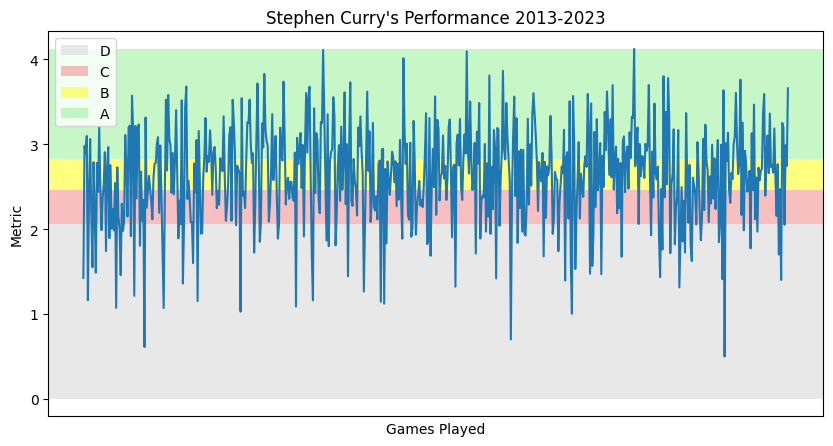

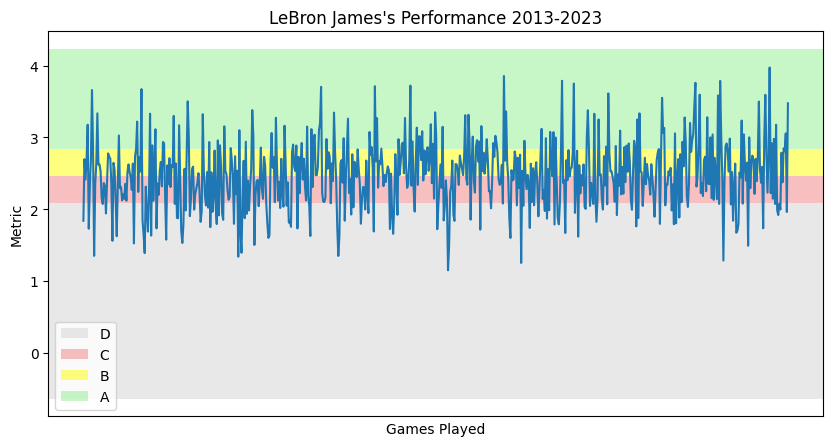

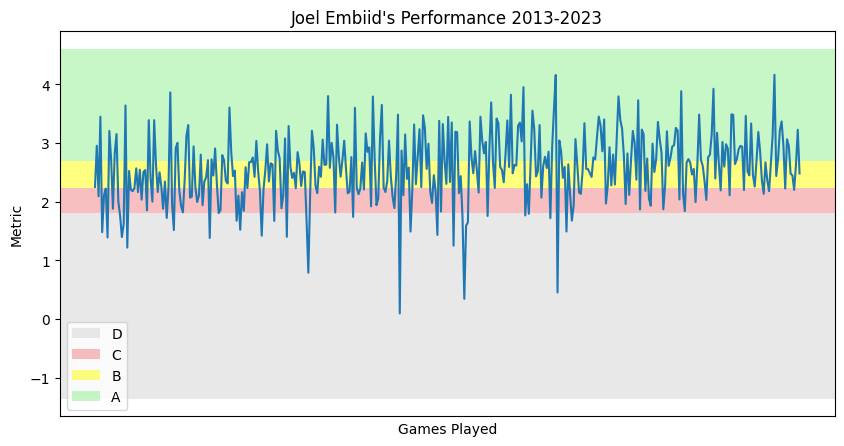

In [212]:
show_performance_by_games("PG", "Stephen Curry")
show_performance_by_games("SF", "LeBron James")
show_performance_by_games("C", "Joel Embiid")


In [213]:
# generate the transition matrix for each position given the action is to NOT trade

pos_df = position_dfs["C"]
pos_df

,PLAYER_NAME,PLAYER_ID,TEAM_NAME,TEAM_ABBREVIATION,GAME_DATE,MATCHUP,METRIC,TIER
0,Nikola Jokic,203999,Denver Nuggets,DEN,2015-10-28T00:00:00,DEN @ HOU,1.000000,D
1,Nikola Jokic,203999,Denver Nuggets,DEN,2015-10-30T00:00:00,DEN vs. MIN,1.286339,D
2,Nikola Jokic,203999,Denver Nuggets,DEN,2015-11-01T00:00:00,DEN @ OKC,0.689566,D
3,Nikola Jokic,203999,Denver Nuggets,DEN,2015-11-05T00:00:00,DEN vs. UTA,1.225564,D
4,Nikola Jokic,203999,Denver Nuggets,DEN,2015-11-06T00:00:00,DEN @ GSW,0.911765,D
...,...,...,...,...,...,...,...,...
2595,Bam Adebayo,1628389,Miami Heat,MIA,2023-03-28T00:00:00,MIA @ TOR,2.140112,C
2596,Bam Adebayo,1628389,Miami Heat,MIA,2023-03-29T00:00:00,MIA @ NYK,1.436723,D
2597,Bam Adebayo,1628389,Miami Heat,MIA,2023-04-04T00:00:00,MIA @ DET,2.180021,C
2598,Bam Adebayo,1628389,Miami Heat,MIA,2023-04-06T00:00:00,MIA @ PHI,1.596334,D


In [267]:
# build the transition matrix for a position
# there are 4 tiers: A, B, C, D and 1000 tenure states
# the transition matrix is 4000x4000
# the ordering of the rows and columns is as follows (TENURE, STATE_CHANGE)
# (0, A), (0, B), (0, C), (0, D), (1, A), (1, B) ... (999, A), (999, B), (999, C), (999, D)
# we do not assume anyone has tenure > 1000 games

def build_player_count_matrix(player_tenure_state_changes):
    count_matrix = np.zeros((4000,4000))
    tenures = np.arange(0,1000)
    count_matrix_index = pd.MultiIndex.from_product([tenures, ["A", "B", "C", "D"]])
    for i, total_state_change in player_tenure_state_changes.iterrows():
        tenure_before, tenure_after  = total_state_change.TOTAL_STATE[0]-1, total_state_change.TOTAL_STATE[0]
        tier_before, tier_after = total_state_change.TOTAL_STATE[1][0], total_state_change.TOTAL_STATE[1][1]
        row_state = (tenure_before, tier_before)
        col_state = (tenure_after, tier_after)

        row = count_matrix_index.get_loc(row_state)
        col = count_matrix_index.get_loc(col_state)
        count_matrix[row, col] += total_state_change.COUNT
        
    return count_matrix



In [215]:
def normalize(matrix):
    tenures = np.arange(0,1000)
    transition_matrix_index = pd.MultiIndex.from_product([tenures, ["A", "B", "C", "D"]])
    for i in range(matrix.shape[0]-2): # do not go to last row
        if np.sum(matrix[i,:]) != 0:
            matrix[i,:] = matrix[i,:]/np.sum(matrix[i,:])
        else:
            # assign equal probability to states (i+1, A), (i+1, B), (i+1, C), (i+1, D)
            state_i = transition_matrix_index[i][0]
            if state_i == 999:
                break
            state_i1_A = transition_matrix_index.get_loc((state_i+1, "A"))
            matrix[i, state_i1_A:state_i1_A+4] = 0.25
    matrix[-1, -1] = 1 #normalize rows with tenure 999
    matrix[-2, -2] = 1 #normalize rows with tenure 998
    matrix[-3, -3] = 1 #normalize rows with tenure 998
    matrix[-4, -4] = 1 #normalize rows with tenure 998

    return matrix



In [285]:
def get_normalized_pos_matrix(pos):
    indi_matrices = []
    for player in position_dfs[pos].PLAYER_NAME.unique():
        for team_played_for in position_dfs[pos].loc[position_dfs[pos].PLAYER_NAME == player].TEAM_NAME.unique():
            player_df = position_dfs[pos].loc[(position_dfs[pos].PLAYER_NAME == player) & (position_dfs[pos].TEAM_NAME == team_played_for)].reset_index(drop=True)
            
            player_df = player_df.assign(LAG_TIER=player_df["TIER"].shift(1))
            player_df = player_df.dropna() #the first game they have ever played will be a NaN (either first game ever or after a trade)
            #! recall that this transition matrix is not for when a trade is just done
        
            # generate the transition matrix for each position given the action is to NOT trade
            # calculate the number of state changes AA, AB, AC, AD, BA, BB, BC, BD, CA, CB, CC, CD, DA, DB, DC, DD
            player_df = player_df.assign(STATE_CHANGE = player_df.LAG_TIER.astype(str) + player_df.TIER.astype(str))

            player_df = player_df.assign(TENURE = player_df.index) #represents movement from (i-1)th game to ith game

            # display(player_df)
            
            # count the number of state changes in each team they've been in (i.e. the number of times they've been traded)
            team_state_changes = player_df.loc[:, ["TENURE", "STATE_CHANGE"]].value_counts().sort_index().reset_index(name="COUNT")
            team_state_changes['TOTAL_STATE'] = list(zip(team_state_changes.TENURE, team_state_changes.STATE_CHANGE))

            # display(team_state_changes)
        
            # build the transition matrix for a position
            player_team_matrix = build_player_count_matrix(team_state_changes)
            indi_matrices.append(player_team_matrix)
        
    pos_matrix_avg = np.mean(np.array(indi_matrices), axis=0)
    norm_pos_matrix_avg = normalize(pos_matrix_avg)
    return norm_pos_matrix_avg


In [ ]:
# Step 2: generate the transition matrix for each position given the action is to trade

In [224]:
position_dfs["SF"]

,PLAYER_NAME,PLAYER_ID,TEAM_NAME,TEAM_ABBREVIATION,GAME_DATE,MATCHUP,METRIC,TIER
0,LeBron James,2544,Miami Heat,MIA,2013-10-29T00:00:00,MIA vs. CHI,1.837998,D
1,LeBron James,2544,Miami Heat,MIA,2013-10-30T00:00:00,MIA @ PHI,2.696224,B
2,LeBron James,2544,Miami Heat,MIA,2013-11-01T00:00:00,MIA @ BKN,2.413017,C
3,LeBron James,2544,Miami Heat,MIA,2013-11-03T00:00:00,MIA vs. WAS,2.706143,B
4,LeBron James,2544,Miami Heat,MIA,2013-11-05T00:00:00,MIA @ TOR,3.176892,A
...,...,...,...,...,...,...,...,...
2751,Jimmy Butler,202710,Miami Heat,MIA,2023-03-25T00:00:00,MIA vs. BKN,2.196382,C
2752,Jimmy Butler,202710,Miami Heat,MIA,2023-03-29T00:00:00,MIA @ NYK,1.990149,D
2753,Jimmy Butler,202710,Miami Heat,MIA,2023-04-01T00:00:00,MIA vs. DAL,3.154319,A
2754,Jimmy Butler,202710,Miami Heat,MIA,2023-04-04T00:00:00,MIA @ DET,2.667108,B


In [268]:
def build_trade_count_matrix(player_trades):
    count_matrix = np.zeros((4,4))
    count_matrix_index = ["A", "B", "C", "D"]

    for i, record in player_trades.iterrows():
        row = count_matrix_index.index(record.LAG_TIER)
        col = count_matrix_index.index(record.TIER)

        count_matrix[row, col] += 1
    
    return count_matrix

In [274]:
def normalize_trade(matrix):
    for i in range(matrix.shape[0]):
        if np.sum(matrix[i,:]) != 0:
            matrix[i,:] = matrix[i,:]/np.sum(matrix[i,:])
        else:
            matrix[i,:] = 0.25
    return matrix


In [284]:
def get_normalized_pos_trade_matrix(pos):
    indi_matrices = []

    for player in position_dfs[pos].PLAYER_NAME.unique():
        player_df = position_dfs[pos].loc[(position_dfs[pos].PLAYER_NAME == player)].reset_index(drop=True)

        # find the rows where the team of the player has changed
        player_df = player_df.assign(LAG_TIER=player_df["TIER"].shift(1))
        player_df = player_df.assign(LAG_TEAM=player_df["TEAM_NAME"].shift(1))
        player_df = player_df.dropna()
        changes = player_df.loc[player_df.LAG_TEAM != player_df.TEAM_NAME].index
        trades = player_df.loc[changes, ["TEAM_NAME", "LAG_TEAM", "LAG_TIER", "TIER"]].reset_index(drop=True)
        

        player_count_matrix = build_trade_count_matrix(trades)
        # display(player_count_matrix)
        indi_matrices.append(player_count_matrix)
        

    pos_trade_matrix_avg = np.mean(np.array(indi_matrices), axis=0)
    norm_pos_trade_matrix_avg = normalize_trade(pos_trade_matrix_avg)
    return norm_pos_trade_matrix_avg
    

In [283]:
get_normalized_pos_trade_matrix("PF")

array([[0.25      , 0.25      , 0.25      , 0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      ],
       [0.5       , 0.5       , 0.        , 0.        ],
       [0.        , 0.33333333, 0.33333333, 0.33333333]])

In [286]:
def create_and_save_pos_matrices(sample):
    positions = ["C", "PF", "PG", "SF", "SG"]
    for action in ["trade", "team"]:
        for pos in positions:
            if action == "team":
                matrix = get_normalized_pos_matrix(pos)
            else:
                matrix = get_normalized_pos_trade_matrix(pos)
                
            if sample:
                np.savetxt("transitions/sample_aggregate/" + action + "/" + pos + "_sample_" + action + "_matrix.csv", matrix, delimiter=",")
            else:
                np.savetxt("transitions/aggregate/" + action + "/" + pos + "_" + action + "_matrix.csv", matrix, delimiter=",")
            
            print("Finished " + pos + " " + action + " matrix")

In [288]:
create_and_save_pos_matrices(SAMPLE)

Finished C trade matrix
Finished PF trade matrix
Finished PG trade matrix
Finished SF trade matrix
Finished SG trade matrix
Finished C team matrix
Finished PF team matrix
Finished PG team matrix
Finished SF team matrix
Finished SG team matrix
